In [1]:
import pandas as pd
import os
import re
import numpy as np

# Combining data

In [36]:
df = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis main\selected_data\selectedData23.parquet")

In [37]:
df.columns

Index(['date', 'rawContent', 'id', 'category'], dtype='object')

In [27]:
df.rename(columns={"category_y": "category"}, inplace=True)

In [29]:
df.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis main\selected_data\selectedData30.parquet")

In [6]:
df.columns

Index(['url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe', 'bookmarkCount', 'filename',
       'filepath'],
      dtype='object')

In [5]:
df['filepath'].value_counts()

filepath
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2020-05-01_2020-06-01_top.parquet    94
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2020-07-01_2020-08-01_top.parquet    93
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2021-02-01_2021-03-01_top.parquet    92
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2021-03-01_2021-04-01_top.parquet    91
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2020-11-01_2020-12-01_top.parquet    90
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2020-08-01_2020-09-01_top.parquet    87
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2022-06-01_2022-07-01_top.parquet    86
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2021-10-01_2021-11-01_top.parquet    86
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2020-06-01_2020-07-01_top.parquet    86
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2022-11-01_2022-12-01_top.parquet    86
/Users/fahad/Desktop/data/Thesis data/Top/BLM_2022-09-01_2022-10-01_top.parquet    86
/Users/fahad/Desktop/data/Thesis data/Top/BLM

In [46]:
df['category'] = df['FilePath'].apply(lambda x: os.path.basename(os.path.dirname(x)))

In [6]:
df['category'] = df['FilePath'].apply(lambda path: path.split("/")[6])

In [6]:
df['category'] = "Big Cities"

In [7]:
df['category'].value_counts()

category
Big Cities    2658
Name: count, dtype: int64

In [8]:
df['category'].isna().sum()

0

In [8]:
df = df[["date", "rawContent", "id", "category"]]

In [34]:
df['category'] = df['category'].apply(lambda value: re.search(r'BLM_(.*?)_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}\.parquet', value).group(1))

In [7]:
df['category'] = df['filename'].str.extract(r'BLM_(.*?)_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}')

In [8]:
df['category'] = df['category'].str.replace('County_', '')

In [22]:
df['category'] = df['filename'].str.replace('BLM_', '')

In [48]:
county_df = pd.read_csv('County-Type-Share.csv')
county_df.drop(columns=['county_cleaned', 'county_state', 'State', 'Type Number', 'FIPS', 'Type Number2', 'Key', 'New Names' ], inplace=True)
new_df = df.merge(county_df, how='left', left_on='category', right_on='County')

In [49]:
new_df['category_y'].value_counts()

category_y
Graying America           791185
Rural Middle America      252249
Evangelical Hubs          216134
College Towns             140069
Hispanic Centers           68057
Exurbs                     66065
Middle Suburbs             48035
Urban Suburbs              38060
Working Class Country      33093
Big Cities                 30042
African American South     26094
Aging Farmlands             8056
Military Posts              4025
LDS Enclaves                  18
Native American Lands          9
Name: count, dtype: int64

In [50]:
new_df['category_y'].isna().sum()

0

In [12]:
new_df['category_y'].fillna('Big Cities', inplace=True)

In [51]:
df = new_df[["date", "rawContent", "id", "category_y"]]

In [10]:
df.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis main\selected_data\selectedData32.parquet")

# Cleaning Data

In [2]:
df = pd.read_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\combined_data.parquet')

In [3]:
df.head()

,date,rawContent,id,category
0,2022-12-30 19:13:04+00:00,"@ohmybeautybank skintype : combi to dry, oily ...",1608904017383653377,African American South
1,2022-12-30 13:17:11+00:00,Really sitting with these inquiry questions th...,1608814457924513792,African American South
2,2022-12-30 02:40:41+00:00,@IanVRowe Narrative feeds Democrats propaganda...,1608654278281023488,African American South
3,2022-12-30 02:32:16+00:00,"@Jack_Royston @cbouzy ""Criticized"". Ms. Weiss ...",1608652157020147712,African American South
4,2022-12-30 01:28:06+00:00,@RepMTG LIAR!!! PROPAGANDA!!! Only domestic te...,1608636011390840832,African American South


In [9]:
df['category'].value_counts()

category
Big Cities                6942499
Graying America           4731866
Rural Middle America      1557254
Exurbs                    1341199
Evangelical Hubs          1019493
College Towns              939110
Middle Suburbs             299360
Hispanic Centers           299139
Urban Suburbs              249073
Working Class Country      168364
African American South      96221
Aging Farmlands             68476
Military Posts              24460
Native American Lands       11830
LDS Enclaves                 6899
Name: count, dtype: int64

In [6]:
df[df['date'] >= '2022-12-01'].drop_duplicates('id', inplace=True)

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_15756\4288224649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['date'] >= '2022-12-01'].drop_duplicates('id', inplace=True)


In [7]:
filtered_df = df[df['date'] >= '2022-12-01']

In [8]:
filtered_df.drop_duplicates('id', inplace=True)

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_15756\3313486687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates('id', inplace=True)


In [9]:
df = df[df['date'] < '2022-12-01']

In [10]:
df = pd.concat([df,filtered_df])

In [ ]:
df.to_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\combined_data.parquet')

# Partition Data

In [2]:
df = pd.read_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\cleaned_data_emotion.parquet')

In [4]:
df.to_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\partitioned_data', partition_cols='category')

# Fine-tuning Sentiment

In [1]:
import logging
import tweetnlp
from pprint import pprint

logging.basicConfig(format='%(asctime)s %(levelname)-8s %(message)s', level=logging.INFO, datefmt='%Y-%m-%d %H:%M:%S')

# set language model and task
language_model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
task = "sentiment"

# load dataset
dataset, label_to_id = tweetnlp.load_dataset(task)

# load trainer
trainer_class = tweetnlp.load_trainer(task)

# define trainer
trainer = trainer_class(
    language_model=language_model,
    dataset=dataset,
    label_to_id=label_to_id,
    max_length=128,
    split_train='train',
    split_test='test',
    output_dir=r'C:\Users\fashaikh\Desktop\Thesis main'
)


c:\Users\fashaikh\Desktop\Thesis main\thesis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-11 15:29:41 WARNING  Found cached dataset tweet_eval (C:/Users/fashaikh/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:00<00:00, 750.01it/s]
2023-06-11 15:29:41 INFO     TrainerTextClassification: cardiffnlp/twitter-roberta-base-sentiment-latest, DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-lat

In [2]:
# train
trainer.train(down_sample_size_train=1000, ray_result_dir="ray_results/test", parallel_cpu=True)

# save model checkpoint
trainer.save_model()

2023-06-11 15:29:53 WARNING  Loading cached shuffled indices for dataset at C:\Users\fashaikh\.cache\huggingface\datasets\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343\cache-25e4fe137f6cca7c.arrow
2023-06-11 15:29:53 WARNING  setup trainer without hyperparameter tuning. (provide `split_validation` for hyperparameter search)
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
c:\Users\fashaikh\Desktop\Thesis main\thesis\.venv\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****

KeyboardInterrupt: 

In [ ]:
# run prediction
trainer.predict('If you wanna look like a badass, have drama on social media')

In [2]:
df = pd.read_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\emotion_results\LDSEnclaves_emotion.parquet')

In [3]:
df.head()

,date,id,cleanedContent,label,probability.anger,probability.anticipation,probability.disgust,probability.fear,probability.joy,probability.love,probability.optimism,probability.pessimism,probability.sadness,probability.surprise,probability.trust
0,2020-05-01 07:12:14+00:00,1256119219990626305,@user WY isn't WY without wild horses. Stop BL...,anger,0.473839,0.052323,0.388494,0.025329,0.009346,0.000815,0.021053,0.009066,0.010938,0.005183,0.003613
1,2020-05-01 07:12:48+00:00,1256119363205128192,@user BLM must abandon plan to eradicate 40% o...,anticipation,0.148803,0.322108,0.124264,0.013845,0.025416,0.001834,0.294473,0.019674,0.013567,0.010044,0.025972
2,2020-05-01 12:20:34+00:00,1256196815340343296,@user @user @user @user @user - as your consti...,anger,0.785090,0.000765,0.209164,0.001733,0.000199,0.000082,0.000520,0.000749,0.001346,0.000193,0.000159
3,2020-05-01 14:46:36+00:00,1256233565592977413,@user BLM must abandon plan to eradicate 40% o...,anticipation,0.148803,0.322108,0.124264,0.013845,0.025416,0.001834,0.294473,0.019674,0.013567,0.010044,0.025972
4,2020-05-01 14:46:52+00:00,1256233631682568193,@user BLM must abandon plan to eradicate 40% o...,anticipation,0.148803,0.322108,0.124264,0.013845,0.025416,0.001834,0.294473,0.019674,0.013567,0.010044,0.025972


In [1]:
import pandas as pd

In [2]:
df1 = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\combined_sentiment.parquet")

In [3]:
df1.columns

Index(['date', 'id', 'cleanedContent', 'label', 'probability.negative',
       'probability.neutral', 'probability.positive', 'category'],
      dtype='object')

In [5]:
df1 = df1[['id', 'cleanedContent', 'label', 'category']]

In [6]:
df1.head()

,id,cleanedContent,label,category
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South
1,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South
3,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South
4,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South


In [7]:
df2 = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\combined_emotion.parquet")

In [8]:
df2.columns

Index(['date', 'id', 'cleanedContent', 'label', 'probability.anger',
       'probability.anticipation', 'probability.disgust', 'probability.fear',
       'probability.joy', 'probability.love', 'probability.optimism',
       'probability.pessimism', 'probability.sadness', 'probability.surprise',
       'probability.trust', 'category'],
      dtype='object')

In [14]:
df2 = df2[['label']]

In [15]:
df2.rename(columns={'label':'emotion_label'}, inplace=True)

In [16]:
df_main = pd.concat([df1, df2], axis=1)

In [18]:
df_main.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\combined_emotion_sentiment.parquet")

In [1]:
import pandas as pd
import polars as pl

In [2]:
df = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\users_data.parquet")

In [3]:
df['user_id'].value_counts()

505829284              33770
135213588              29588
1268961880250482691    26934
702628629814124545     22470
1298671741347213312    20031
                       ...  
992999963775913990         1
1022297195515719680        1
1273050412267048960        1
1098251149067599879        1
1562973168                 1
Name: user_id, Length: 1629236, dtype: int64

In [4]:
top_user = df[df['user_id'] == 505829284]

In [5]:
top_user['id'].value_counts()

1608409819140198400    47
1608402830452486146    43
1311440557047250946    37
1311432712180375553    37
1311414739554234372    37
                       ..
1460147886084308993     1
1460154892979478528     1
1460163467676164098     1
1460186431121506306     1
1532742566885658625     1
Name: id, Length: 17524, dtype: int64

In [11]:
combined = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\combined_emotion_sentiment.parquet")

In [7]:
df = df[['id', 'user_id']]

In [12]:
combined = combined.merge(df, 'left', on='id')

# new

In [2]:
df = pd.read_parquet("/Users/fahad/development/thesis/final_v2.parquet")

In [3]:
df['emotion_label'].value_counts()

emotion_label
anger           3048518
optimism         621653
joy              380545
anticipation     214635
sadness          213073
fear             207647
Name: count, dtype: int64

In [13]:
df[df['emotion_label'] == 'joy']['cleanedContent'].sample(10).values

array(['We are manufacturer and exporters all kinds of sports wear Fully Sublimated and customize With Your Custom Design for order come inbox or WhatsAap:+923127356746 #sweatsuits #tracksuit #hoodies #tbt #BlackOwned #BlackLivesMatter #promoteblackbussiness http',
       "We're happy and proud to be the community bank within the cities of Harlem, NY, Newark, NJ, Forestville and Oxon Hill in PG County Maryland, and Washington, DC. #communitybanking #bankblack #buyblack #qurantine #blackankstosupport #blackbusiness #blackbusinessestosupport #blm http",
       'I am very proud that Jackson was confirmed to the Supreme Court I am very ashamed that it took 233 years to appoint a Black woman... . . . . . #KetanjiBrownJackson #SupremeCourtconfirmation #SupremeCourtJusticeJackson #AmericanHistory #equality #BlackLivesMatter #BlackWomen',
       "Don't get me wrong- I love seeing everybody in my feed being vocal about BLM. But it takes more than retweeting. Donate. Sign petitions. Protest. You

In [14]:
len(df)

4686071

In [6]:
df.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,...,probability.negative,probability.neutral,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness,Normalized_sentiment_score
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,...,0.830641,0.159382,0.009977,0.279881,0.004095,0.352227,0.000745,0.003695,0.359357,-0.850836
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,anger,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,...,0.806295,0.188493,0.005212,0.796906,0.005784,0.159391,0.000317,0.000924,0.036677,-0.830837
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,...,0.484034,0.357467,0.158500,0.810908,0.010574,0.014736,0.002848,0.137127,0.023808,-0.345149
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,...,0.170736,0.617685,0.211579,0.013011,0.030190,0.004790,0.005827,0.929707,0.016474,0.029040
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,...,0.005067,0.107326,0.887606,0.007553,0.072251,0.001653,0.069170,0.847429,0.001945,0.888683


In [8]:
df.columns

Index(['id', 'cleanedContent', 'label', 'category', 'emotion_label', 'text',
       'text_without_stopwords', 'text_lemmatized',
       'text_without_stopwords_freq', 'date', 'rawContent',
       'probability.negative', 'probability.neutral', 'probability.positive',
       'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness',
       'Normalized_sentiment_score'],
      dtype='object')

In [3]:
df = df[['category', 'Normalized_sentiment_score']]

In [4]:
df = df.groupby('category').mean()

In [11]:
df

,Normalized_sentiment_score
category,
African American South,-0.448874
Aging Farmlands,-0.421124
Big Cities,-0.349284
College Towns,-0.467725
Evangelical Hubs,-0.521461
Exurbs,-0.387603
Graying America,-0.447931
Hispanic Centers,-0.499610
LDS Enclaves,-0.284632


In [11]:
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
res = stats.shapiro(df['Normalized_sentiment_score'])

In [7]:
res.statistic

0.972080647945404

In [8]:
res.pvalue

0.8875840902328491

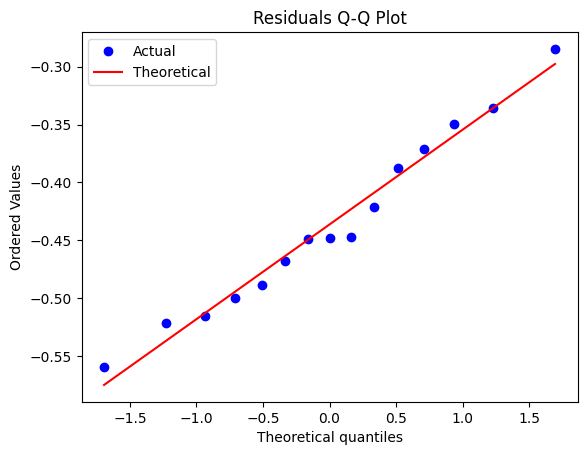

In [15]:
stats.probplot(df['Normalized_sentiment_score'], dist="norm", plot=plt)
plt.title("Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()